# Conservative SDOF - Harmonic Balance (1)

- Good for strongly and weakly NL systems
- Requires significant knowledge about system studied 
- Similar to Galerkin method, but in time

## Overview

Assume an harmonic expansion for $x(t)$

$$
\begin{gather*}
     x(t) = \sum^N_{m = 0} A_m \cos\left( m\omega t + m \beta_0\right)
\end{gather*}
$$

substitute this into the EOM and enforce zero projected residual, i.e. taking the inner product with orthogonal assumption.

$$
\begin{gather*}
    \left< EOM_{LHS},\phantom{-} \cos\left(m\omega t + m\beta_0\right) \right> = 0\\
    m = 0, 1, 2, \cdots, N
\end{gather*}
$$

which is 

$$
\begin{gather*}
    \int_0^{\frac{2\pi}{\omega} } \left( EOM_{LHS}\bullet \cos\left(m\omega t + m\beta_0\right) \right)dt
\end{gather*}
$$

Then we solve for $A_0, A_2, A_3, \cdots, A_n$ and $\omega$ in terms of $A_1$ and other system parameters. In this example we solve the following equation

$$
\begin{gather*}
    \ddot{x} + \omega_0^2 x + \alpha_2 x^2 + \alpha_3 x^3 = 0.
\end{gather*}
$$

## Assumed Harmonic Expansion - up to and including $\cos\left(2\left(\omega t + \beta \right)\right)$

Assume a harmonic expansion for $x(t)$ - will use this to satisfy the cubic equation, so include harmonic terms at twice the linear natrual frequency 

Note: phi = omega * t + beta0

In [1]:
import sympy as sp
from sympy.simplify.fu import TR4, TR7, TR8, TR11
import numpy as np
from itertools import combinations_with_replacement
from math import factorial

In [2]:
M = 2  # order of harmonic expansion
Ai = sp.symbols('A_(0:' + str(M+1) + ')', real=True)  # coefficient A
t, w, w0 = sp.symbols('t omega omega_0', real=True, positive=True)
b0 = sp.Symbol('beta_0')

# harmonic expansion of x(t)
phi = sp.Symbol('phi')
xh = sp.Function('x_h')(phi)
xh = sum([Ai[i] * sp.cos(i * phi) for i in range(M+1)])
xh

A_0 + A_1*cos(phi) + A_2*cos(2*phi)

In [3]:
# Defining the EOM
N = 3  # order of powered terms of alpha 
ai = sp.symbols('alpha_(2:' + str(N+1) + ')')
x = sp.Function('x')(phi)

# EOM
EOM = w**2 * sp.diff(x, phi, 2) + w0**2 * x + sum([ai[i-2] * x**i for i in range(2, N+1)])
EOM = sp.Eq(EOM, 0)
EOM

Eq(alpha_2*x(phi)**2 + alpha_3*x(phi)**3 + omega**2*Derivative(x(phi), (phi, 2)) + omega_0**2*x(phi), 0)

In [4]:
# Substitute x(t) for the harmonic expansion of x(t) into EOM
err = EOM.lhs.subs(x, xh).doit().expand()
err = TR7(err).expand()
err = TR8(err).expand()
err

A_0**3*alpha_3 + 3*A_0**2*A_1*alpha_3*cos(phi) + 3*A_0**2*A_2*alpha_3*cos(2*phi) + A_0**2*alpha_2 + 3*A_0*A_1**2*alpha_3*cos(2*phi)/2 + 3*A_0*A_1**2*alpha_3/2 + 3*A_0*A_1*A_2*alpha_3*cos(phi) + 3*A_0*A_1*A_2*alpha_3*cos(3*phi) + 2*A_0*A_1*alpha_2*cos(phi) + 3*A_0*A_2**2*alpha_3*cos(4*phi)/2 + 3*A_0*A_2**2*alpha_3/2 + 2*A_0*A_2*alpha_2*cos(2*phi) + A_0*omega_0**2 + 3*A_1**3*alpha_3*cos(phi)/4 + A_1**3*alpha_3*cos(3*phi)/4 + 3*A_1**2*A_2*alpha_3*cos(2*phi)/2 + 3*A_1**2*A_2*alpha_3*cos(4*phi)/4 + 3*A_1**2*A_2*alpha_3/4 + A_1**2*alpha_2*cos(2*phi)/2 + A_1**2*alpha_2/2 + 3*A_1*A_2**2*alpha_3*cos(phi)/2 + 3*A_1*A_2**2*alpha_3*cos(3*phi)/4 + 3*A_1*A_2**2*alpha_3*cos(5*phi)/4 + A_1*A_2*alpha_2*cos(phi) + A_1*A_2*alpha_2*cos(3*phi) - A_1*omega**2*cos(phi) + A_1*omega_0**2*cos(phi) + 3*A_2**3*alpha_3*cos(2*phi)/4 + A_2**3*alpha_3*cos(6*phi)/4 + A_2**2*alpha_2*cos(4*phi)/2 + A_2**2*alpha_2/2 - 4*A_2*omega**2*cos(2*phi) + A_2*omega_0**2*cos(2*phi)

Note there are terms with frequency content as high as $6\phi$

To find $A_0$, $\omega$, $A_2$, we project the error back on the assumed expansion and set the projections to zero

Note: same as setting the coefficients in front of each $\cos(n\phi)$ to zero for $n = 0, 1, 2$

In [5]:
proj_eqn = {}
for i in range(M+1):
    proj_eqn['eq'+str(i)] = sp.integrate(sp.expand_trig(err * sp.cos(i * phi)), (phi, 0, 2*sp.pi))

In [6]:
proj_eqn['eq0']

2*pi*A_0**3*alpha_3 + 2*pi*A_0**2*alpha_2 + 3*pi*A_0*A_1**2*alpha_3 + 3*pi*A_0*A_2**2*alpha_3 + 2*pi*A_0*omega_0**2 + 3*pi*A_1**2*A_2*alpha_3/2 + pi*A_1**2*alpha_2 + pi*A_2**2*alpha_2

In [7]:
proj_eqn['eq1']

3*pi*A_0**2*A_1*alpha_3 + 3*pi*A_0*A_1*A_2*alpha_3 + 2*pi*A_0*A_1*alpha_2 + 3*pi*A_1**3*alpha_3/4 + 3*pi*A_1*A_2**2*alpha_3/2 + pi*A_1*A_2*alpha_2 - pi*A_1*omega**2 + pi*A_1*omega_0**2

In [8]:
proj_eqn['eq2']

3*pi*A_0**2*A_2*alpha_3 + 3*pi*A_0*A_1**2*alpha_3/2 + 2*pi*A_0*A_2*alpha_2 + 3*pi*A_1**2*A_2*alpha_3/2 + pi*A_1**2*alpha_2/2 + 3*pi*A_2**3*alpha_3/4 - 4*pi*A_2*omega**2 + pi*A_2*omega_0**2

if $A_1$ is small neglect terms with $A_0^2, A_2^2, A_0A_2, A_1^2A_0, A_0^3, A_1^2A_2, \cdots$

This is because there is the assumption of 
$$
\begin{gather*}
    A_1 > A_i \phantom{---} i = 0, 2, 3, \cdots
\end{gather*}
$$

equation 0 tells us that $A_0$ is proportional to $A_1$ squared - We have a constant term multiplying $A_0$ (in addition to others) and no $A_1$ terms but only $A_1^2$ terms.

In [9]:
deglist = list(map(int, sp.degree_list(proj_eqn['eq0'], gens=Ai)))
A1_deg = deglist[1]
removing_combos = []
Ai_ = tuple(filter(lambda A: A != Ai[1], Ai))

# A1 ** n -> n can be up to O(A1**4) which is square of A1**2
keep_terms = []
for i in range(A1_deg+1, A1_deg**2+1):
    temp = []
    for j in range(i):
        temp.append(Ai[1])
    keep_terms.append(tuple(temp))

temp = list(combinations_with_replacement(Ai_, A1_deg))
for t in temp:
    if t not in keep_terms:
        removing_combos.append(t)
    
for i in range(A1_deg+1, max(deglist)+1):
    temp = list(combinations_with_replacement(Ai, i))
    for t in temp:
        if t not in keep_terms:
            removing_combos.append(t)
        
eq_copy = proj_eqn['eq0']
for term in removing_combos:
    eq_copy = eq_copy.subs(np.prod(term), 0)

eq_copy = sp.Eq(eq_copy, 0)

eq0_new = eq_copy
eq0_ordered = eq0_new
epsilon = sp.Symbol('epsilon')
for A in Ai_:
    eq0_ordered = eq0_ordered.subs(A, epsilon**A1_deg * A)
eq0_ordered = sp.collect(eq0_ordered.subs(Ai[1], epsilon * Ai[1]).lhs, epsilon)
eq0_ordered = sp.Eq(eq0_ordered, 0)

eq_copy = sp.Eq(Ai[0], sp.solve(eq_copy, Ai[0])[0])
eq_copy

Eq(A_0, -A_1**2*alpha_2/(2*omega_0**2))

equation 2 tells $A_2$ is also proportional to $A_1$ squared 

In [10]:
deglist = list(map(int, sp.degree_list(proj_eqn['eq2'], gens=Ai)))
A1_deg = deglist[1]
Ai_ = tuple(filter(lambda A: A != Ai[1], Ai))

for i in range(A1_deg+1, max(deglist)+1):
    temp = list(combinations_with_replacement(Ai, i))
    for t in temp:
        if t not in removing_combos:
            if t not in keep_terms:
                removing_combos.append(t)

eq_copy = proj_eqn['eq2']
for term in removing_combos:
    eq_copy = eq_copy.subs(np.prod(term), 0)

eq_copy = sp.Eq(eq_copy, 0)

eq2_new = eq_copy
eq2_ordered = eq2_new
for A in Ai_:
    eq2_ordered = eq2_ordered.subs(A, epsilon**A1_deg * A)
eq2_ordered = sp.collect(eq2_ordered.subs(Ai[1], epsilon * Ai[1]).lhs, epsilon)
eq2_ordered = sp.Eq(eq2_ordered, 0)

eq_copy = sp.Eq(Ai[2], sp.solve(eq_copy, Ai[2])[0])
eq_copy

Eq(A_2, A_1**2*alpha_2/(2*(4*omega**2 - omega_0**2)))

In [11]:
eq_copy = proj_eqn['eq1']
for term in removing_combos:
    eq_copy = eq_copy.subs(np.prod(term), 0)

eq_copy = sp.Eq(eq_copy, 0)
eq1_new = eq_copy
eq1_ordered = eq1_new
for A in Ai_:
    eq1_ordered = eq1_ordered.subs(A, epsilon**A1_deg * A)
eq1_ordered = sp.collect(eq1_ordered.subs(Ai[1], epsilon * Ai[1]).lhs, epsilon)
eq1_ordered = sp.Eq(eq1_ordered, 0)

To facilitate the solution, we order the coefficients using epsilon and then ignore all terms quadratic and higher in $A_0$ and $A_2$ - this means we keep terms up to tand including $O(\epsilon^3)$ -> small amplitude assumption

$A_1$ is ordered at $\epsilon$ and $A_0$ and $A_2$ are order at $\epsilon^2$

In [12]:
# Eq0
eq0_ordered

Eq(epsilon**2*(2*pi*A_0*omega_0**2 + pi*A_1**2*alpha_2), 0)

In [13]:
# Eq1 
eq1_ordered

Eq(epsilon**3*(2*pi*A_0*A_1*alpha_2 + 3*pi*A_1**3*alpha_3/4 + pi*A_1*A_2*alpha_2) + epsilon*(-pi*A_1*omega**2 + pi*A_1*omega_0**2), 0)

In [14]:
# Eq2
eq2_ordered

Eq(epsilon**2*(pi*A_1**2*alpha_2/2 - 4*pi*A_2*omega**2 + pi*A_2*omega_0**2), 0)

In [15]:
A0_sol = sp.solve(eq0_ordered, Ai[0])[0]
A0_sol

-A_1**2*alpha_2/(2*omega_0**2)

In [16]:
A2_sol = sp.solve(eq2_ordered, Ai[2])[0]
A2_sol

A_1**2*alpha_2/(2*(4*omega**2 - omega_0**2))

In [17]:
eq1_ordered_update = eq1_ordered.subs([
    (Ai[0], A0_sol), (Ai[2], A2_sol)
])
omegaSol = sp.solve(eq1_ordered_update, w)

In [18]:
omegaSol[0]

-sqrt(2)*sqrt(-4*A_1**2*alpha_2**2*epsilon**2 + 3*A_1**2*alpha_3*epsilon**2*omega_0**2 + 5*omega_0**4 - sqrt(16*A_1**4*alpha_2**4*epsilon**4 - 24*A_1**4*alpha_2**2*alpha_3*epsilon**4*omega_0**2 + 9*A_1**4*alpha_3**2*epsilon**4*omega_0**4 - 16*A_1**2*alpha_2**2*epsilon**2*omega_0**4 + 18*A_1**2*alpha_3*epsilon**2*omega_0**6 + 9*omega_0**8))/(4*omega_0)

In [19]:
omegaSol[1]

sqrt(2)*sqrt(-4*A_1**2*alpha_2**2*epsilon**2 + 3*A_1**2*alpha_3*epsilon**2*omega_0**2 + 5*omega_0**4 - sqrt(16*A_1**4*alpha_2**4*epsilon**4 - 24*A_1**4*alpha_2**2*alpha_3*epsilon**4*omega_0**2 + 9*A_1**4*alpha_3**2*epsilon**4*omega_0**4 - 16*A_1**2*alpha_2**2*epsilon**2*omega_0**4 + 18*A_1**2*alpha_3*epsilon**2*omega_0**6 + 9*omega_0**8))/(4*omega_0)

In [20]:
omegaSol[2]

-sqrt(2)*sqrt(-4*A_1**2*alpha_2**2*epsilon**2 + 3*A_1**2*alpha_3*epsilon**2*omega_0**2 + 5*omega_0**4 + sqrt(16*A_1**4*alpha_2**4*epsilon**4 - 24*A_1**4*alpha_2**2*alpha_3*epsilon**4*omega_0**2 + 9*A_1**4*alpha_3**2*epsilon**4*omega_0**4 - 16*A_1**2*alpha_2**2*epsilon**2*omega_0**4 + 18*A_1**2*alpha_3*epsilon**2*omega_0**6 + 9*omega_0**8))/(4*omega_0)

In [21]:
omegaSol[3]

sqrt(2)*sqrt(-4*A_1**2*alpha_2**2*epsilon**2 + 3*A_1**2*alpha_3*epsilon**2*omega_0**2 + 5*omega_0**4 + sqrt(16*A_1**4*alpha_2**4*epsilon**4 - 24*A_1**4*alpha_2**2*alpha_3*epsilon**4*omega_0**2 + 9*A_1**4*alpha_3**2*epsilon**4*omega_0**4 - 16*A_1**2*alpha_2**2*epsilon**2*omega_0**4 + 18*A_1**2*alpha_3*epsilon**2*omega_0**6 + 9*omega_0**8))/(4*omega_0)

We are keeping up to $O(\epsilon^4)$ only - use this to get our final expression for $\omega$

In [22]:
# The built in sympy series command takes forever (bad algorithm) so we just implement our original Taylor series function
def taylor(expr, var, upto):
    res = expr.subs(var, 0)
    dexpr = sp.diff(expr, var)
    for n in range(1,upto+1):
        res += dexpr.subs(var, 0) / factorial(n) * var**n
        dexpr = sp.diff(dexpr, var)
    return res + sp.O(var**upto)

In [23]:
omega1 = taylor(omegaSol[0], epsilon, 4)
omega1

-omega_0/2 - epsilon**2*(-4*A_1**2*alpha_2**2 + 3*A_1**2*alpha_3*omega_0**2 - (-16*A_1**2*alpha_2**2*omega_0**4 + 18*A_1**2*alpha_3*omega_0**6)/(6*omega_0**4))/(8*omega_0**3) + O(epsilon**4)

In [24]:
omega2 = taylor(omegaSol[1], epsilon, 4)
omega2

omega_0/2 + epsilon**2*(-4*A_1**2*alpha_2**2 + 3*A_1**2*alpha_3*omega_0**2 - (-16*A_1**2*alpha_2**2*omega_0**4 + 18*A_1**2*alpha_3*omega_0**6)/(6*omega_0**4))/(8*omega_0**3) + O(epsilon**4)

In [25]:
omega3 = taylor(omegaSol[2], epsilon, 4)
omega3

-omega_0 - epsilon**2*(-4*A_1**2*alpha_2**2 + 3*A_1**2*alpha_3*omega_0**2 + (-16*A_1**2*alpha_2**2*omega_0**4 + 18*A_1**2*alpha_3*omega_0**6)/(6*omega_0**4))/(16*omega_0**3) + O(epsilon**4)

In [26]:
omega4 = taylor(omegaSol[3], epsilon, 4)
omega4

omega_0 + epsilon**2*(-4*A_1**2*alpha_2**2 + 3*A_1**2*alpha_3*omega_0**2 + (-16*A_1**2*alpha_2**2*omega_0**4 + 18*A_1**2*alpha_3*omega_0**6)/(6*omega_0**4))/(16*omega_0**3) + O(epsilon**4)

Note: we get a spurious solution - response at 1/2 $\omega_0$

In [27]:
omega = sp.simplify(omega2)
omega

omega_0/2 - A_1**2*alpha_2**2*epsilon**2/(6*omega_0**3) + O(epsilon**4)

In [28]:
t = sp.Symbol('t')
phi_temp = omega.removeO() * t
phi_temp

t*(-A_1**2*alpha_2**2*epsilon**2/(6*omega_0**3) + omega_0/2)

In [29]:
x = xh.subs([
    (Ai[0], A0_sol), (Ai[2], A2_sol), (phi, omega.removeO()*t)
])
x = x.subs(w, omega.removeO())
x

A_1**2*alpha_2*cos(2*t*(-A_1**2*alpha_2**2*epsilon**2/(6*omega_0**3) + omega_0/2))/(2*(-omega_0**2 + 4*(-A_1**2*alpha_2**2*epsilon**2/(6*omega_0**3) + omega_0/2)**2)) - A_1**2*alpha_2/(2*omega_0**2) + A_1*cos(t*(-A_1**2*alpha_2**2*epsilon**2/(6*omega_0**3) + omega_0/2))

In [30]:
initial_amplitude = sp.simplify(x.subs([
    (t, 0), (epsilon, 1)
]))
initial_amplitude

(-A_1**4*alpha_2**4 + 2*A_1**3*alpha_2**3*omega_0**2 + 6*A_1**2*alpha_2**2*omega_0**4 - 12*A_1*alpha_2*omega_0**6 + 9*omega_0**8)/(2*alpha_2*omega_0**2*(A_1**2*alpha_2**2 - 6*omega_0**4))

In [31]:
ic = float(sp.simplify(initial_amplitude.subs([
    (Ai[1], 1), (ai[0], 1), (ai[1], 1), (w0, 1)
])))
ic

-0.4

In [32]:
# We plot the phase plane of this system 

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, DOP853
from typing import List

In [33]:
# System
def sys(t, x):
    return [x[1], -x[0] - x[0]**2 - x[0]**3]

def solve_diffeq(func, t, tspan, ic, parameters={}, algorithm='DOP853', stepsize=np.inf):
    return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
                     args=tuple(parameters.values()), atol=1e-8, rtol=1e-5, max_step=stepsize)

def phasePlane(x1, x2, func, params):
    X1, X2 = np.meshgrid(x1, x2)  # create grid
    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    for i in range(NI):
        for j in range(NJ):
            x = X1[i, j]
            y = X2[i, j]
            dx = func(0, (x, y), *params.values())  # compute values on grid
            u[i, j] = dx[0]
            v[i, j] = dx[1]
    M = np.hypot(u, v)
    u /= M
    v /= M
    return X1, X2, u, v, M

def DEplot(sys: object, tspan: tuple, x0: List[List[float]], 
           x: np.ndarray, y: np.ndarray, params: dict):
    if len(tspan) != 3:
        raise Exception('tspan should be tuple of size 3: (min, max, number of points).')
    # Set up the figure the way we want it to look
    plt.figure(figsize=(12, 9))

    X1, X2, dx1, dx2, M = phasePlane(
        x, y, sys, params
    )

    # Quiver plot
    plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
    plt.grid()
    
    if tspan[0] < 0:
        t1 = np.linspace(0, tspan[0], tspan[2])
        t2 = np.linspace(0, tspan[1], tspan[2])
        if min(tspan) < 0:
            t_span1 = (np.max(t1), np.min(t1))
        else:
            t_span1 = (np.min(t1), np.max(t1))
        t_span2 = (np.min(t2), np.max(t2))
        for x0i in x0:
            sol1 = solve_diffeq(sys, t1, t_span1, x0i, params)
            plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
            sol2 = solve_diffeq(sys, t2, t_span2, x0i, params)
            plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')
    else:
        t = np.linspace(tspan[0], tspan[1], tspan[2])
        t_span = (np.min(t), np.max(t))
        for x0i in x0:
            sol = solve_diffeq(sys, t, t_span, x0i, params)
            plt.plot(sol.y[0, :], sol.y[1, :], '-r')
        

    plt.xlim([np.min(x), np.max(x)])
    plt.ylim([np.min(y), np.max(y)])
    plt.show()

Using the initial condition found, we get response with period $2\pi$ not $4\pi$

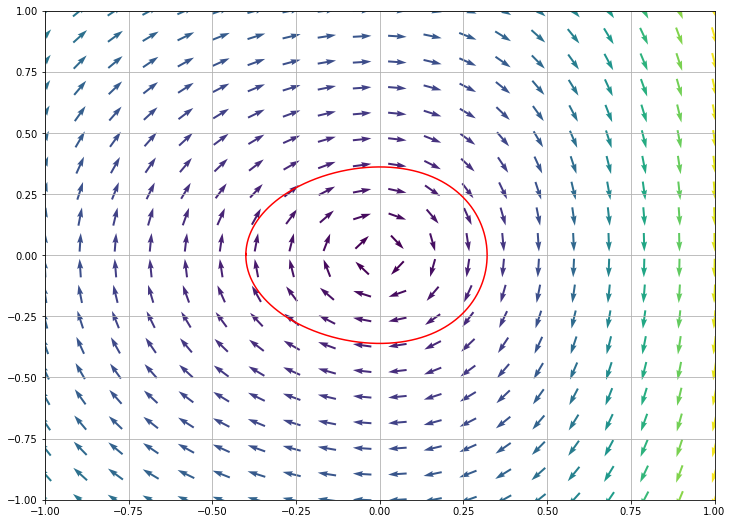

In [34]:
x0 = [[-0.4, 0.0]]

x1 = np.linspace(-1, 1, 20)
x2 = np.linspace(-1, 1, 20)

DEplot(sys, (0, 2*np.pi, 1000), x0, x1, x2, {})

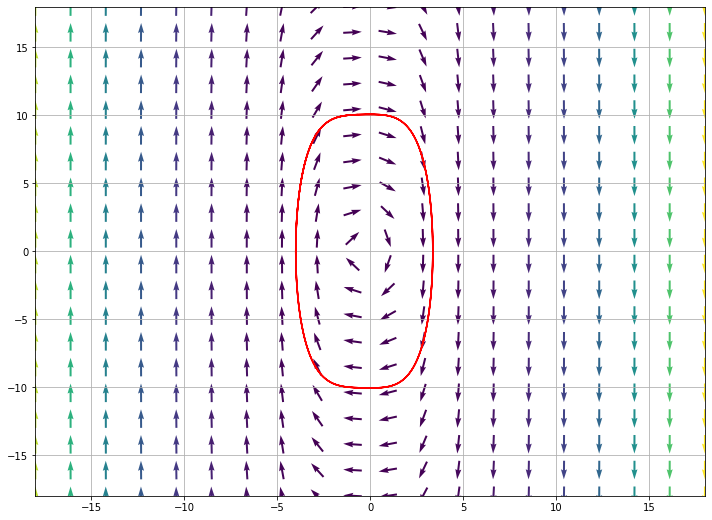

In [35]:
x0 = [[-4.0, 0.0]]

x1 = np.linspace(-18, 18, 20)
x2 = np.linspace(-18, 18, 20)

DEplot(sys, (0, 2*np.pi, 1000), x0, x1, x2, {})